In [1]:
import numpy as np
import pandas as pd 
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay



# Get the data

In [ ]:
%run "datasets/parse.ipynb"
trainx_df = parse_train("")
testx_df = parse_test("")
trainy_df = parse_train("")
testy_df = parse_test("")

In [5]:
print(trainy_df['Injecao na rede (kWh)'].value_counts())

Diabetes
1.0    23404
0.0    21703
Name: count, dtype: int64


## 10-Fold Cross Validation

In [26]:
cross_valid_model = SVC(random_state=2023)
scores = cross_val_score(cross_valid_model, testx_df, np.ravel(testy_df), cv=10)
scores

array([0.74023946, 0.72149922, 0.74648621, 0.73295159, 0.7397189 ,
       0.7548152 , 0.71822917, 0.73854167, 0.73333333, 0.73854167])

In [7]:
print("%0.2f accuracy with a standard deviation of %0.2f"%(scores.mean(),scores.std()))


0.74 accuracy with a standard deviation of 0.01


## Hold Out


In [24]:
model= SVC(random_state=25112002)
model.fit(trainx_df,trainy_df)
predictions=model.predict(testx_df)
print("%0.2f accuracy"%(accuracy_score(testy_df,predictions)))


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.74 accuracy


<function matplotlib.pyplot.show(close=None, block=None)>

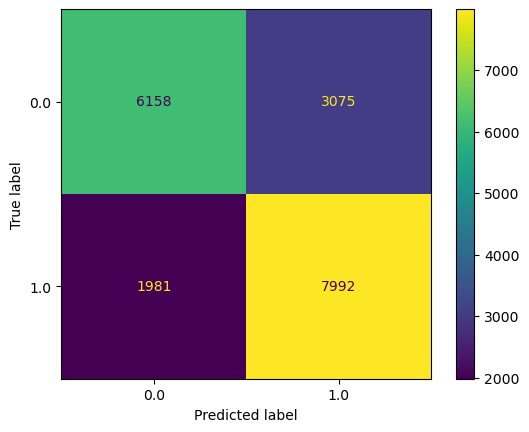

In [25]:
ConfusionMatrixDisplay.from_predictions(testy_df, predictions)
plt.show

## Grid Search

In [9]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01],'kernel':['rbf']}
grid = GridSearchCV(SVC(random_state=25112002),param_grid,refit=True,verbose=3,cv=2)
grid.fit(trainx_df,np.ravel(trainy_df))

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.725 total time=  46.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.728 total time=  46.3s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=  42.9s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=  44.3s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.717 total time=  47.6s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.703 total time=  45.7s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.737 total time=  47.8s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.733 total time=  45.0s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=  39.4s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.737 total time=  40.4s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.735 total time=  43.1s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;

GridSearchCV(cv=2, estimator=SVC(random_state=25112002),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [13]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [14]:
grid.best_estimator_


SVC(C=1, gamma=0.1, random_state=25112002)

In [15]:
predictions= grid.best_estimator_.predict(testx_df)


In [17]:
print(confusion_matrix(testy_df,predictions))
print('Accuracy',metrics.accuracy_score(testy_df,predictions))
print('F1 score',f1_score(testy_df,predictions, average='macro'))
print('Recall score',recall_score(testy_df,predictions))

[[6035 3198]
 [1796 8177]]
Accuracy 0.7399770904925544
F1 score 0.7367020814013151
Recall score 0.8199137671713627


<function matplotlib.pyplot.show(close=None, block=None)>

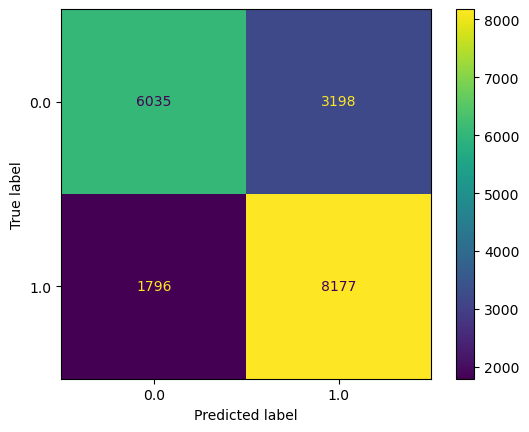

In [23]:
ConfusionMatrixDisplay.from_predictions(testy_df, predictions)
plt.show